# Linear Regression

In [2]:
import time

import numpy as np
  vb 
import pandas as pd

import scipy as sp
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
from scipy.spatial.distance import pdist, squareform

import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.utils as utils
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.cluster as cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from patsy import dmatrices

import seaborn as sns
%matplotlib inline

/Users/Lucas/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/Lucas/anaconda/lib/python2.7/argparse.pyc, but /Users/Lucas/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


### Basics on Linear Regression

##### The Linear Regression Model 

$$Y = \alpha +\beta X +\epsilon$$
    
We **know**: $X$ and $Y$

We **do not know **: $\alpha$, $\beta$ and $\epsilon$

**Goal:** Given $X$ and $Y$ produce estimates of $\alpha$ and $\beta$ denoted by $\widehat{\alpha}$ and $\widehat{\beta}$ 


##### Input/output

Input data comes in the form of pairs $\left(X_i,Y_i\right)$  for $i=1,\ldots ,n$

The **true regression line **: For **every** individual it should hold that:
$$Y_i = \alpha +\beta X_i +\epsilon_i$$


**Error** for the $i$-th data point is: $$ \epsilon_i = Y_i-\alpha-\beta X_i $$


The **estimated regression line ** : $$\widehat{Y_i}=\widehat{\alpha}+\widehat{\beta}X_i$$


**Residuals** measure distance between each observation from the estimated regression line and are defined as follows: $$\widehat{\epsilon_i} = Y_i-\widehat{Y_i}$$

##### Ordinary Least Squares Regression as an optimization problem

**Question**: How do we find $\widehat{\alpha}$ and $\widehat{\beta}$?

**Answer**: By minimizing the residuals, or *sum of squared residuals* :

\begin{eqnarray}
\text{SSR} & = & \sum_{i=1}^n \widehat{\epsilon_i}^2 \\
& = & \sum_{i=1}^n \left(Y_i-\widehat{Y_i}\right)^2
\end{eqnarray}

$\alpha,\beta$ are called **regression coefficients**

$\widehat{\alpha},\widehat{\beta}$ are called ** OLS (Ordinary Least Squares} regression coefficients**

$\alpha$ (or $\widehat{\alpha}$) is not so interesting

$\beta$ (or $\widehat{\beta}$) is more interesting as it shows the change in $Y$ that can be caused by a unit of change in $X$

##### Measuring the fit of a regression model and $R^2$

The most common measure of fit is referred to as $R^2$

$R^2$ measures the variability of $Y$ that can be explained by $X$

Derivation:
    $$\text{Var}(Y) =\frac{\sum_{i=1}^n \left(Y_i-\overline{Y}\right)}{n-1} $$
where:
$\overline{Y}=\frac{1}{n}\sum_{i=1}^nY_i$

Total Sum of Squares (TSS) is:

$$\text{TSS} = \sum_{i=1}^n\left(Y_i-\overline{Y}\right)^2 $$


Now we can show that:

$$\text{TSS} = \text{SSR} + \text{RSS},$$

where Sum of Squares Residuals (SSR) is:
$$\text{SSR} = \sum_{i=1}^n \left(Y_i-\widehat{Y_i}\right)^2,$$

and Regresion Sum of Squares (RSS) is:

$$\text{RSS} = \sum_{i=1}^n \left(\widehat{Y_i}-\overline{Y}\right)^2,$$


Variability in $Y$ can be due to explained (RSS) and unexplained parts (SSR).


Measure of fit $R^2$:

\begin{eqnarray}
R^2 & = & \frac{\text{RSS}}{\text{TSS}} = 1-\frac{\text{SSR}}{\text{TSS}}
\end{eqnarray}


$0\leq R^2\leq 1$; the closer the value of $R^2$ is to $1$ the better the fit of the regression; small values of SSR imply that the residuals are small and therefore we have a better fit.

##### How accurate are the estimates $\widehat{\alpha}$ and $\widehat{\beta}$

95% Confidence interval $[x,y]$ for $\widehat{\alpha}$: We are 95% certain that $\alpha$ lies in $[x,y]$

##### Example - I

Generate a dataset using the **datasets.makeregression( )** function

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

In [ ]:
X, y = datasets.make_regression(n_samples=100, n_features=1, bias=0.1, noise=30, random_state=1)
print X.shape, y.shape

In [ ]:
plt.scatter(X, y, c="slategray")

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print results.summary()
print "Confidence Intervals:", results.conf_int()
print "Parameters:", results.params

A more detailed explanation of the results can be found here:
http://connor-johnson.com/2014/02/18/linear-regression-with-python/

In [ ]:
plt.scatter(X,y, c="slategray")
plt.plot(X,results.predict(X), c='seagreen', alpha=0.8)

##### Multidimensional data

** Input **: $(Y,X_1,X_2,\ldots , X_k)$

$Y_i = \alpha +\beta_1X_1+\beta_2X_2+\ldots  + \beta_k X_k$

**Output **: Estimates $\widehat{\alpha},\widehat{\beta_i}$ for $i=1\ldots k$ that minimize

$\text{SSR} = \sum_{i=1}^n\left(\widehat{Y_i} - \widehat{\alpha} -\widehat{\beta_1}X_1-\widehat{\beta_2}X_2-\ldots - \widehat{\beta_k} X_k\right)^2$


##### Example - II

Use again the **datasets.makeregression( )** function

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

In [ ]:
X, y = datasets.make_regression(n_samples=100, n_features=20, n_informative=5, bias=0.1, noise=30, random_state=1)
print X.shape, y.shape

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print results.summary()
print "Confidence Intervals:", results.conf_int()
print "Parameters:", results.params

### Analyzing CA housing dataset

In [3]:
ca = datasets.fetch_california_housing();

downloading Cal. housing from http://lib.stat.cmu.edu/modules.php?op=modload&name=Downloads&file=index&req=getit&lid=83 to /Users/Lucas/scikit_learn_data


<class 'sklearn.datasets.base.Bunch'>
<type 'numpy.ndarray'>
(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['data', 'feature_names', 'DESCR', 'target']
[ 4.526  3.585  3.521 ...,  0.923  0.847  0.894]
(20640,)
[array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ..., 
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), ['MedInc', 'HouseAge', 'AveRooms', 'Av

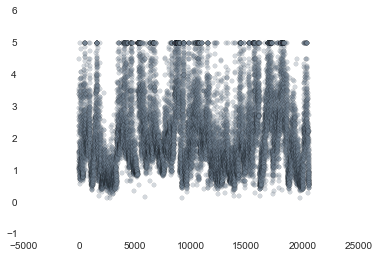

In [4]:
print type(ca)
print type(ca.data)
X = ca.data
print X.shape
print ca.feature_names
print ca.keys()
print ca.target
y = ca.target;
print y.shape
plt.scatter(range(len(y)), y, c="slategray", alpha=0.3, linewidths=0.2)
print ca.values()

In [6]:
X, y = utils.shuffle(X, y, random_state=1)

Split the data into training and testing

In [7]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
print(X_train.shape), y_train.shape
print(X_test.shape), y_test.shape

(12384, 8) (12384,)
(8256, 8) (8256,)


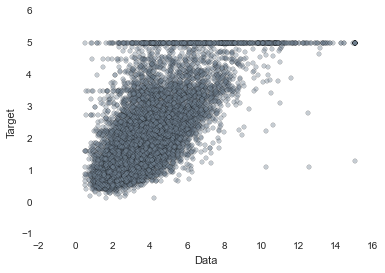

In [8]:
subX_train = X_train[:,0]
subX_test = X_test[:,0]
plt.scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)
# plt.scatter(subX_test, y_test, c="seagreen", alpha=0.2, linewidths=0.3)
plt.xlabel('Data')
plt.ylabel('Target');


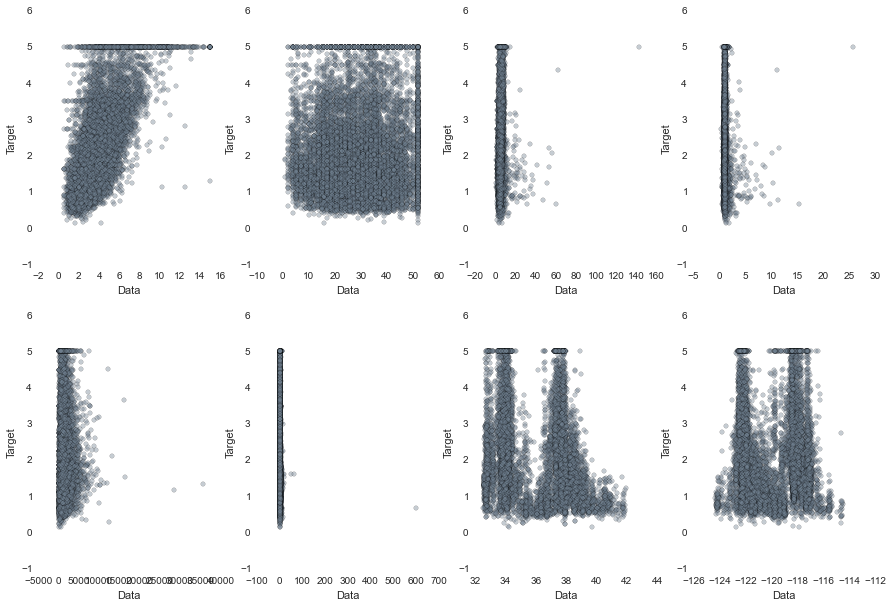

In [9]:
fig, axes = plt.subplots(2,4,figsize=(15,10))

for i in range(8):
    plt_i = i // 4
    plt_j = i % 4
    subX_train = X_train[:,i]
    # plt.subplot(2, 4, 1 + i)
    axes[plt_i][plt_j].scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)
    #plt.scatter(subX_test, y_test)
    axes[plt_i][plt_j].set_xlabel('Data')
    axes[plt_i][plt_j].set_ylabel('Target'); 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [10]:
regr = linear_model.LinearRegression()

Fit the model

In [11]:
print X_train.shape
regr.fit(X_train, y_train);

(12384, 8)


The coefficients and the bias are now computed

In [12]:
# The mean square error
print("Training error: ", metrics.mean_squared_error(regr.predict(X_train),y_train))
print("Test     error: ", metrics.mean_squared_error(regr.predict(X_test),y_test))

('Training error: ', 0.53876527900453219)
('Test     error: ', 0.50887414098701311)


##### The score( ) function of python's LinearRegression

Returns the coefficient of determination R^2 of the prediction.

The coefficient $R^2$ is defined as $(1 - u/v)$, where u is the regression sum of squares ((y_true - y_pred)^2).sum( ) and v is the residual sum of squares ((y_true - y_true.mean( ))^2).sum( ). Best possible score is 1.0, lower values are worse.

In [13]:
train_score = regr.score(X_train,y_train)
test_score = regr.score(X_test,y_test)
print("Training score: ", train_score)
print("Test     score: ", test_score)

('Training score: ', 0.60476540751315455)
('Test     score: ', 0.6036455783495136)


In [14]:
coefficients = regr.coef_
for i in range(len(coefficients)):
    print ca.feature_names[i],"\t",coefficients[i]

MedInc 	0.444771770943
HouseAge 	0.0093577644033
AveRooms 	-0.119907268585
AveBedrms 	0.771133840254
Population 	-3.15661562579e-06
AveOccup 	-0.00717650388891
Latitude 	-0.428392417068
Longitude 	-0.439783862238


In [15]:
print pd.DataFrame(zip(ca.feature_names, np.transpose(coefficients)))

            0         1
0      MedInc  0.444772
1    HouseAge  0.009358
2    AveRooms -0.119907
3   AveBedrms  0.771134
4  Population -0.000003
5    AveOccup -0.007177
6    Latitude -0.428392
7   Longitude -0.439784


In [16]:
regr = linear_model.LinearRegression()
scores = cross_validation.cross_val_score(regr, X, y, cv=5)
print scores

[ 0.60980293  0.5866528   0.61568038  0.60041716  0.59617339]


In [17]:
print("Regression score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Regression score: 0.60 (+/- 0.02)


##### Visualizing the results of linear regression

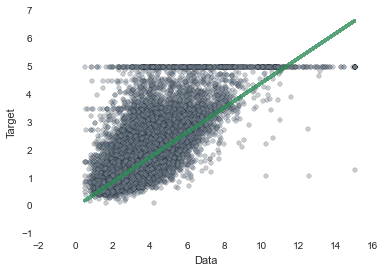

In [18]:
subX_train = X_train[:,0]
subX_test = X_test[:,0]
plt.scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)
plt.plot(subX_train, coefficients[0]*subX_train, color='seagreen', linewidth=3, alpha=.8);
plt.xlabel('Data')
plt.ylabel('Target');

### Food for thought: Analyzing Boston housing dataset

In [19]:
boston = datasets.load_boston()

(506, 13)
<type 'numpy.ndarray'>
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4 

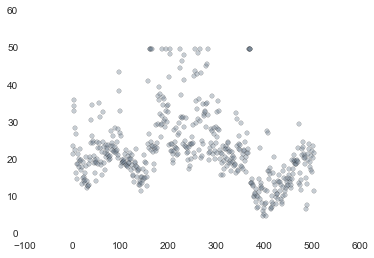

In [20]:
print boston.data.shape
print type(boston.data)
X = boston.data
print X.shape
print boston.feature_names
print boston.target
y = boston.target;
print y.shape
plt.scatter(range(len(y)), y, c="slategray", alpha=0.4, linewidths=0.3)


In [21]:
X, y = utils.shuffle(X, y, random_state=1)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
print(X_train.shape), y_train.shape
print(X_test.shape), y_test.shape

(303, 13) (303,)
(203, 13) (203,)


In [22]:
regr = linear_model.LinearRegression()
print X_train.shape
regr.fit(X_train, y_train);
# The mean square error
print("Training error: ", np.mean((regr.predict(X_train) - y_train) ** 2))
print("Test     error: ", np.mean((regr.predict(X_test) - y_test) ** 2))

(303, 13)
('Training error: ', 23.852514439487081)
('Test     error: ', 21.165355231412846)


In [23]:
train_score = regr.score(X_train,y_train)
test_score = regr.score(X_test,y_test)
print("Training score: ", train_score)
print("Test     score: ", test_score)

('Training score: ', 0.72876185350841505)
('Test     score: ', 0.73252323807787878)


In [24]:
coefficients = regr.coef_
for i in range(len(coefficients)):
    print boston.feature_names[i],"\t",coefficients[i]

CRIM 	-0.136618767402
ZN 	0.0701953194538
INDUS 	0.0282714727579
CHAS 	3.05389909915
NOX 	-23.0193666945
RM 	2.79053778612
AGE 	0.026956164238
DIS 	-1.6696628054
RAD 	0.396886140113
TAX 	-0.0167965717484
PTRATIO 	-0.84335353018
B 	0.00270790484867
LSTAT 	-0.647459876686


In [25]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()